In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from soMaps import SOM

## 4.1

In [2]:
data = np.genfromtxt('data_lab2/animals.dat',
                     dtype=None,
                     delimiter=',')
data = data.reshape(32,84) # species x attributes
names = np.loadtxt("data_lab2/animalnames.txt", dtype=str)

In [3]:
som = SOM(num_features=84, data=data, num_nodes=100, seed = 21)
som.train(20,0.2,data,50,1,False)

In [4]:
results = {n:0 for n in names}
for idx, n in enumerate(names):
    index = som.get_closest_node(idx)
    results[n] = index
results = dict(sorted(results.items(), key=lambda item: item[1]))

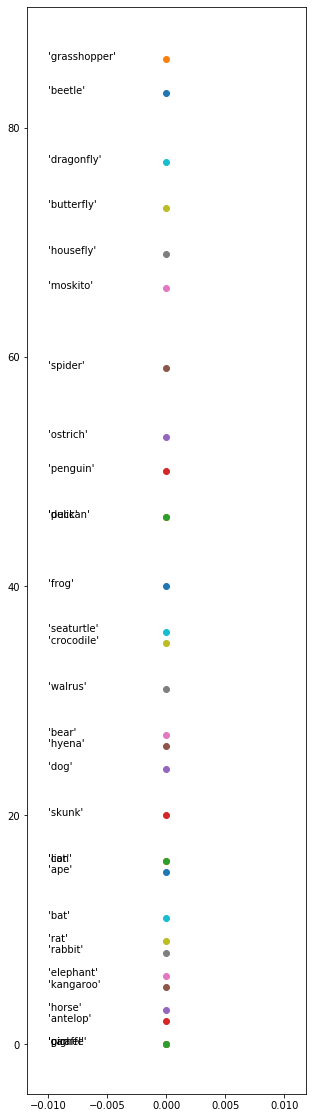

In [5]:
plt.figure(figsize=(5,20))
for key in results.keys():
    v = results[key]
    plt.scatter(0,v)
    plt.text(-0.01,v,key)

In [6]:
results

{"'camel'": 0,
 "'giraffe'": 0,
 "'pig'": 0,
 "'antelop'": 2,
 "'horse'": 3,
 "'kangaroo'": 5,
 "'elephant'": 6,
 "'rabbit'": 8,
 "'rat'": 9,
 "'bat'": 11,
 "'ape'": 15,
 "'cat'": 16,
 "'lion'": 16,
 "'skunk'": 20,
 "'dog'": 24,
 "'hyena'": 26,
 "'bear'": 27,
 "'walrus'": 31,
 "'crocodile'": 35,
 "'seaturtle'": 36,
 "'frog'": 40,
 "'duck'": 46,
 "'pelican'": 46,
 "'penguin'": 50,
 "'ostrich'": 53,
 "'spider'": 59,
 "'moskito'": 66,
 "'housefly'": 69,
 "'butterfly'": 73,
 "'dragonfly'": 77,
 "'beetle'": 83,
 "'grasshopper'": 86}

## 4.2

In [7]:
#load data
cities = np.genfromtxt('data_lab2/cities.dat',
                     dtype=float,
                     delimiter=',',
                     skip_header=3)
cities = cities[:,:2]

In [8]:
# init and train model
som2 = SOM(num_features=2, data=cities, num_nodes=10, seed=6)
som2.train(100,0.3,cities,2,0,True)

In [9]:
#sort results
results = {i:0 for i in range(10)}
for idx in range(10):
    index = som2.get_closest_node(idx)
    results[idx] = index
results = dict(sorted(results.items(), key=lambda item: item[1]))
path = np.array([key for key in results.keys()])

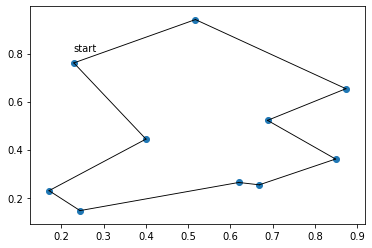

In [10]:
#plot results
plt.scatter(cities[:,0],cities[:,1])
# label starting point
start = path[0]
pos = cities[start]
plt.text(pos[0],pos[1]+0.05,'start')
#plot path
for i,c in enumerate(path):
    x1 = cities[c]
    x2 = cities[path[(i+1)%len(path)]]
    plt.plot([x1[0],x2[0]],[x1[1],x2[1]],color='black',linewidth=0.9)

## 4.3

In [11]:
import random
import matplotlib.colors as mcolors

In [12]:
votes = np.genfromtxt('data_lab2/votes.dat',dtype=float,delimiter=',')
votes = votes.reshape(349,31)
party = np.genfromtxt('data_lab2/mpparty.dat',dtype=int,delimiter=',',skip_header=3)
gender = np.genfromtxt('data_lab2/mpsex.dat',dtype=int,delimiter=',',skip_header=1)
district = np.genfromtxt('data_lab2/mpdistrict.dat',dtype=int,delimiter=',',skip_header=1)
# colors = np.array([key for key in mcolors.CSS4_COLORS.keys()])
# random.shuffle(colors)

In [13]:
som3 = SOM(num_features=31, data=votes, num_nodes=100, seed=22, grid=(10,10))
som3.train(30,0.2,votes,50,1,False) #here the num_neighbours are distances

In [14]:
a = np.array([0.5, 2, 6, 1, 1.5, 10])
b = [i for i,v in enumerate(a) if v <= 2]
print(b)

[0, 1, 3, 4]


#### labeld by party

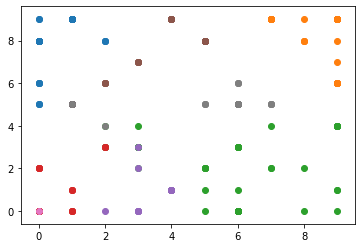

In [15]:
results = {p:([],[]) for p in party}
for i,p in enumerate(party):
    w_id = som3.get_closest_node(i)
    pos = som3.mapping[w_id]
    results[p][0].append(pos[0])
    results[p][1].append(pos[1])
    pos = som3.mapping[w_id]
    # c = colors[p]
    # plt.scatter(pos[0],pos[1],color = c)
for key in results.keys():
    plt.scatter(results[key][0],results[key][1])

#### labeld by gender

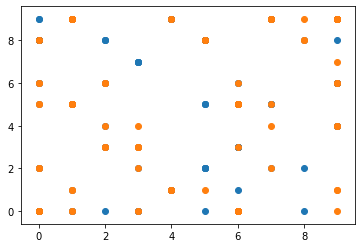

In [16]:
results = {p:([],[]) for p in gender}
for i,p in enumerate(gender):
    w_id = som3.get_closest_node(i)
    pos = som3.mapping[w_id]
    results[p][0].append(pos[0])
    results[p][1].append(pos[1])
    pos = som3.mapping[w_id]
    # c = colors[p]
    # plt.scatter(pos[0],pos[1],color = c)
for key in results.keys():
    plt.scatter(results[key][0],results[key][1])

#### labeld by district

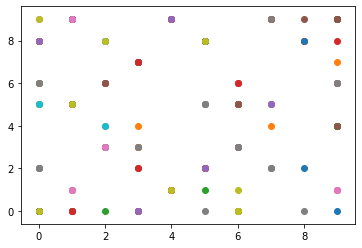

In [17]:
results = {p:([],[]) for p in district}
for i,p in enumerate(district):
    w_id = som3.get_closest_node(i)
    pos = som3.mapping[w_id]
    results[p][0].append(pos[0])
    results[p][1].append(pos[1])
    pos = som3.mapping[w_id]
    # c = colors[p]
    # plt.scatter(pos[0],pos[1],color = c)
for key in results.keys():
    plt.scatter(results[key][0],results[key][1])